In [2]:
%run phugoid.py
%matplotlib inline

Below is the first initial conditions given in numerical mooc, showing "trochoidal"-like paths. This should be true for values of C that are 0 < C < 2/3.

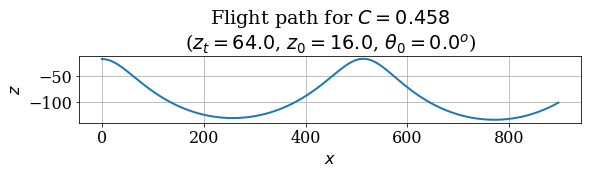

In [3]:
plot_flight_path(64.0, 16.0, 0.0)

Now to experiment with other values of C in that range:

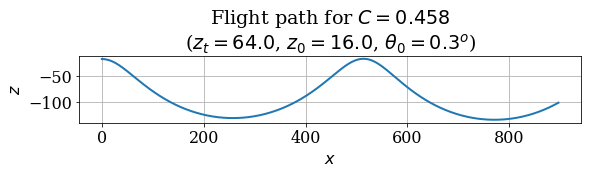

In [4]:
plot_flight_path(64.0, 16.0, 0.33)

The following is the second example from numerical mooc, showing that if the value of c is negitive then the flight path will be a series of loops:

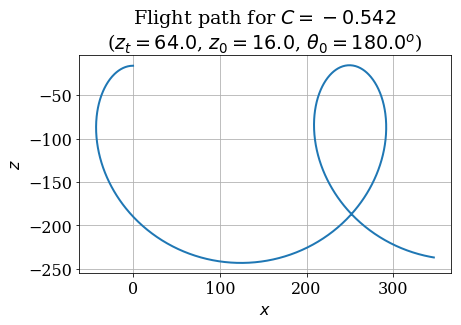

In [5]:
plot_flight_path(64.0, 16.0, 180.0)

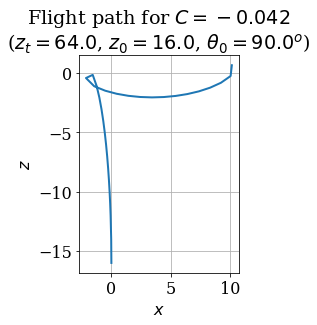

In [6]:
plot_flight_path(64.0,16.0,90.0)

And we see that this is true for all values of a negitive C, with the second example being one to use for experiments with different values.

Now the following is the last case from numerical mooc in which C = 0. In which case there is a constant radius of curvature producing semi circles:

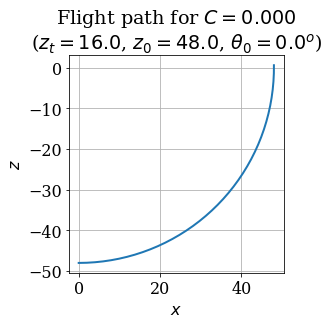

In [7]:
plot_flight_path(16.0, 48.0, 0.0)

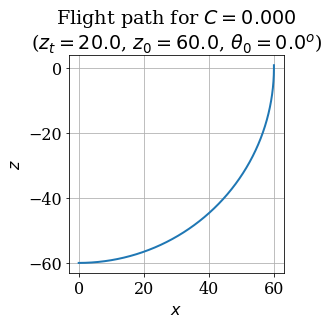

In [12]:
plot_flight_path(20.0, 60.0, 0.0)

And this can be reproduced with different values for the initial conditions, as shown in the second graph.

This is the last portion of lesson 1 for phugoid motion. Below is from work with lesson 2.

In [18]:
import numpy 
from matplotlib import pyplot
%matplotlib inline

In [19]:
T = 100.0
dt = 0.001
N = int(T / dt) + 1 #number of time steps
t = numpy.linspace(0.0, T, num=N)

In [20]:
z0 = 100.0
b0 = 10.0
zt = 100.0
g = 9.81

u = numpy.array([z0, b0])

z = numpy.zeros(N)
z[0] = z0

In [21]:
for n in range (1, N):
    rhs = numpy.array([u[1], g * (1 - u[0] / zt)])
    u = u + dt * rhs
    z[n] = u[0]

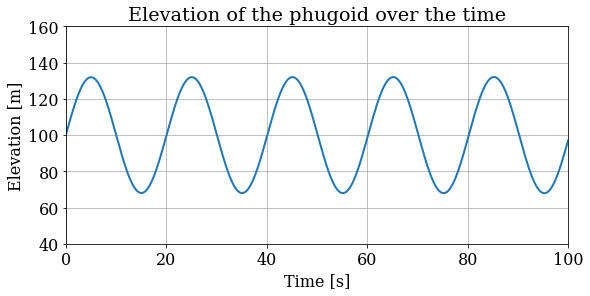

In [22]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

pyplot.figure(figsize=(9.0, 4.0))
pyplot.title('Elevation of the phugoid over the time')
pyplot.xlabel('Time [s]')
pyplot.ylabel('Elevation [m]')
pyplot.xlim(t[0], t[-1])
pyplot.ylim(40.0, 160.0)
pyplot.grid()
pyplot.plot(t, z, color='C0', linestyle='-', linewidth=2);

In [23]:
z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g/zt)**0.5*t)+(z0-zt)
           * numpy.cos((g/zt)**0.5 *t) +zt)

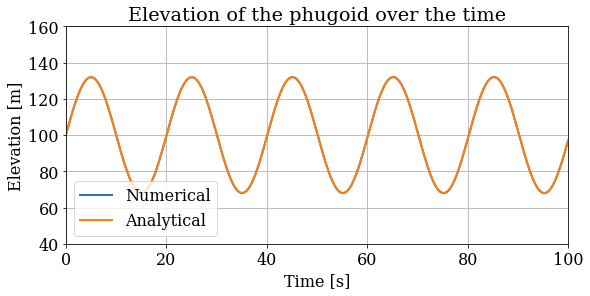

In [25]:
pyplot.figure(figsize=(9.0, 4.0)) 
pyplot.title('Elevation of the phugoid over the time')
pyplot.xlabel('Time [s]')  
pyplot.ylabel('Elevation [m]') 
pyplot.xlim(t[0], t[-1])  
pyplot.ylim(40.0, 160.0)  
pyplot.grid()  
pyplot.plot(t, z, label='Numerical',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(t, z_exact, label='Analytical',
            color='C1', linestyle='-', linewidth=2)
pyplot.legend();  

The above is the code to calculate the numerical and exact solutions. By decreasing the step size of Euler's solution I was able to have the numerical and analytical solutions match for the whole graph. However, they will separate at some later point that is not graphed. This is a result of the error associated with performing an Eulers' method approximation.

Below is an error calculation, it will solve for many values including the step size used in the above graph.

In [31]:
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

z_values = []

for dt in dt_values:
    N = int(T / dt) + 1  
    t = numpy.linspace(0.0, T, num=N)  
 
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
 
    for n in range(1, N):
        rhs = numpy.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt * rhs
        z[n] = u[0]  
    z_values.append(z)  

In [32]:
def l1_error(z, z_exact, dt):
    
    error = dt * numpy.sum(numpy.abs(z - z_exact))
    return error

In [33]:
error_values = []

for z, dt in zip(z_values, dt_values): #zip will iterate over two values at the same time
    N = int(T / dt) + 1  
    t = numpy.linspace(0.0, T, num=N)  #recompute the time grid
    z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5 * t) +
               (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)
  
    error_values.append(l1_error(z, z_exact, dt)) #evaluate the error

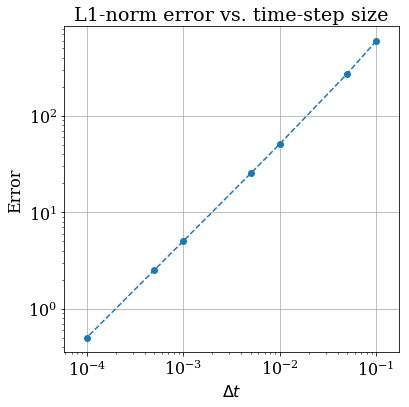

In [34]:

pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm error vs. time-step size')  
pyplot.xlabel('$\Delta t$')  
pyplot.ylabel('Error')
pyplot.grid()
pyplot.loglog(dt_values, error_values,
              color='C0', linestyle='--', marker='o') 
pyplot.axis('equal');

The fifth plotted data point counting from the right is the error for the plotted comparison of numerical and analytic solutions. 

As the error timesteps get smaller and smaller in values the error also decreases, which is what we wanted!